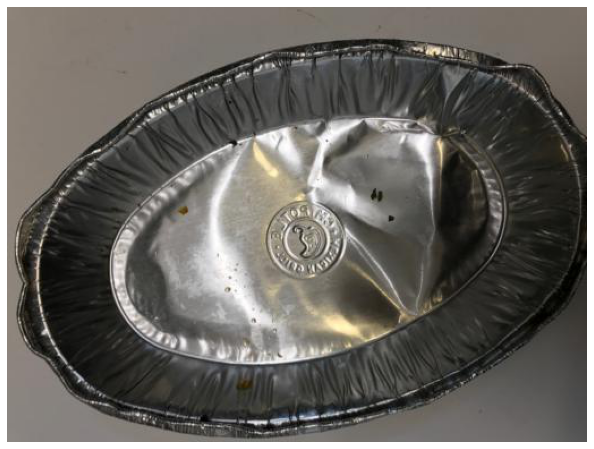

In [ ]:
path = "/Users/razan/Downloads/dataset-resized/metal"

A = imread(path + '/metal50.jpg')
#A = np.mean(A, -1); # Convert to grayscale
ori_img = plt.imshow(A)
ori_img.set_cmap('gray')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Distribution of Pixel Values of Original Image')

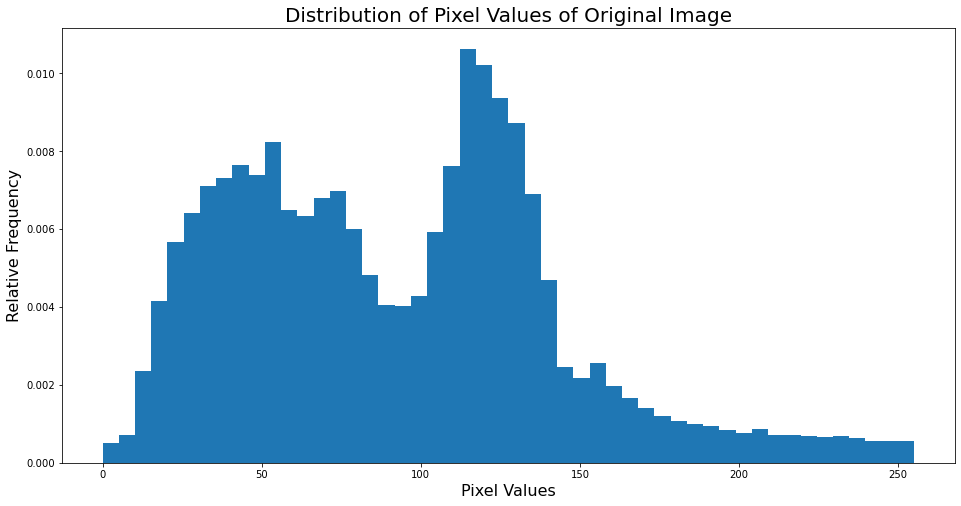

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
# load the image
img_path = "/Users/razan/Downloads/dataset-resized/metal/metal50.jpg"
img = Image.open(img_path)
 
# convert PIL image to numpy array
img_np = np.array(img)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("Pixel Values", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.ylabel("Relative Frequency", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.title("Distribution of Pixel Values of Original Image", fontdict={'fontsize': 20, 'fontweight': 'medium'})

Text(0.5, 1.0, 'Distribution of Pixel Values of Tensor Image')

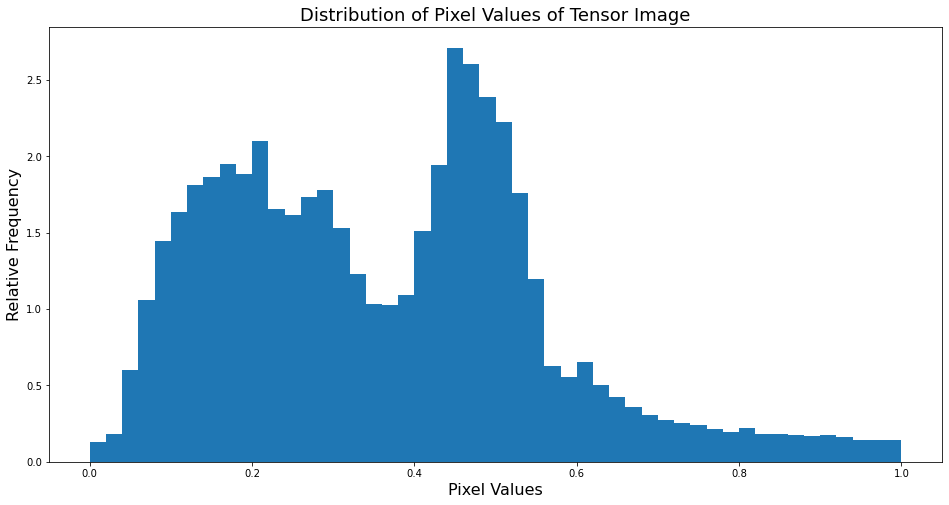

In [ ]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
 
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])
 
# transform the pIL image to tensor
# image
img_tr = transform(img)
 
# Convert tensor image to numpy array
img_np = np.array(img_tr)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("Pixel Values", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.ylabel("Relative Frequency", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.title("Distribution of Pixel Values of Tensor Image", fontdict={'fontsize': 18, 'fontweight': 'medium'})

In [ ]:
img_tr = transform(img)
 
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
 
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.3786, 0.3672, 0.3463])
Std of the image: tensor([0.2043, 0.1968, 0.1930])


Text(0.5, 1.0, 'Distribution of Pixel Values After Normalization')

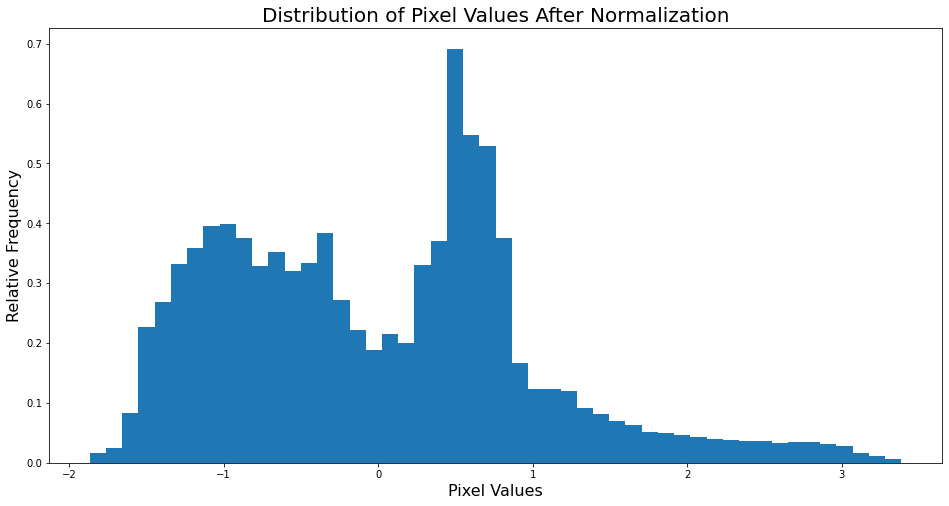

In [ ]:
from torchvision import transforms
 
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
 
# get normalized image
img_normalized = transform_norm(img)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("Pixel Values", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.ylabel("Relative Frequency", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.title("Distribution of Pixel Values After Normalization", fontdict={'fontsize': 20, 'fontweight': 'medium'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

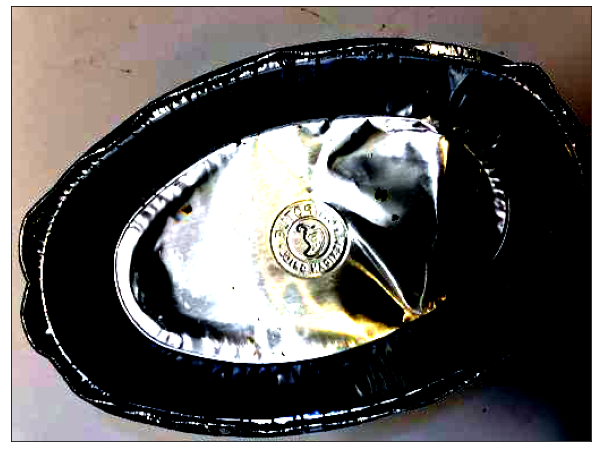

In [ ]:
img_normalized = transform_norm(img)
 
# convert this image to numpy array
img_normalized = np.array(img_normalized)
 
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)
 
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])

In [ ]:
img_nor = transform_norm(img)
 
# cailculate mean and std
mean, std = img_nor.mean([1,2]), img_nor.std([1,2])
 
# print mean and std
print("Mean and Std of normalized image:")
print("Mean of the image:", mean)
print("Std of the image:", std)

Mean and Std of normalized image:
Mean of the image: tensor([-8.9865e-07, -1.7633e-07,  4.0435e-08])
Std of the image: tensor([1.0000, 1.0000, 1.0000])


In [ ]:
import skimage.measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import imghdr

def create_imgs_matrix(directory, px_size=50):
    global image_files   
    global imgs_matrix
    image_files = []
    # create list of all files in directory     
    folder_files = [filename for filename in os.listdir(directory)]  
    
    # create images matrix   
    counter = 0
    for filename in folder_files: 
        # check if the file is accesible and if the file format is an image
        if not os.path.isdir(directory + filename) and imghdr.what(directory + filename):
            # decode the image and create the matrix
            img = cv2.imdecode(np.fromfile(directory + filename, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            if type(img) == np.ndarray:
                img = img[...,0:3]
                # resize the image based on the given compression value
                img = cv2.resize(img, dsize=(px_size, px_size), interpolation=cv2.INTER_CUBIC)
                if counter == 0:
                    imgs_matrix = img
                    image_files.append(filename)
                    counter += 1
                else:
                    imgs_matrix = np.concatenate((imgs_matrix, img))
                    image_files.append(filename)
    return imgs_matrix



In [ ]:
A = create_imgs_matrix('/Users/razan/Downloads/dataset-resized/glass/',px_size=50)
B = create_imgs_matrix('/Users/razan/Downloads/dataset-resized/papercopy/',px_size=50)

In [ ]:
# Function that calulates the mean squared error (mse) between two image matrices
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [ ]:
mse(A,B)

15548.597540918163

In [ ]:
#Function for rotating an image matrix by a 90 degree angle
def rotate_img(image):
    image = np.rot90(image, k=1, axes=(0, 1))
    return image

In [ ]:
AR = rotate_img(A)

In [ ]:
mse(AR,AR)

0.0

In [ ]:
# Function for checking the quality of compared images, appends the lower quality image to the list
def check_img_quality(directory, imageA, imageB, list):
    size_imgA = os.stat(directory + imageA).st_size
    size_imgB = os.stat(directory + imageB).st_size
    if size_imgA > size_imgB:
        add_to_list(imageB, list)
    else:
        add_to_list(imageA, list)

In [ ]:
from difPy import dif
search = dif("/Users/razan/Downloads/dataset-resized/glass/")
search.result

#To search for duplicates within two folders:

#from difPy import dif
#search = dif("C:/Path/to/Folder_A/", "C:/Path/to/Folder_B/")

DifPy preparing files: [501/501] [100%]
DifPy comparing images: [501/501] [100%]
Found 6 images with one or more duplicate/similar images in 32.4465 seconds.


OrderedDict([('20221114024553189760',
              {'filename': 'glass13.jpg',
               'location': '/Users/razan/Downloads/dataset-resized/glass/glass13.jpg',
               'duplicates': ['/Users/razan/Downloads/dataset-resized/glass/glass12.jpg']}),
             ('20221114024553301887',
              {'filename': 'glass12.jpg',
               'location': '/Users/razan/Downloads/dataset-resized/glass/glass12.jpg',
               'duplicates': ['/Users/razan/Downloads/dataset-resized/glass/glass15.jpg',
                '/Users/razan/Downloads/dataset-resized/glass/glass191.jpg']}),
             ('20221114024558199113',
              {'filename': 'glass15.jpg',
               'location': '/Users/razan/Downloads/dataset-resized/glass/glass15.jpg',
               'duplicates': ['/Users/razan/Downloads/dataset-resized/glass/glass188.jpg',
                '/Users/razan/Downloads/dataset-resized/glass/glass3.jpg',
                '/Users/razan/Downloads/dataset-resized/glass/glass191